# <font color="blue">Random Forest</font>

## Feature Information
- Target(Y) = United Kingdom  
- Independent(X) = Europe, Australia and Switzerland

## Ensemble Stratergy

<b>Regression1: </b>
- Y = alpha + beta*X

<b>Regression2:<b>
- Yt = alpha + beta*ADS

<b>Regression3:</b>
- Yt = alpha + beta1*PC1 + beta2*PC2 + beat*PC3

<b>Regression4:</b>
- Yt = alpha + beta1*PC1 + beta2*ADS

# Importing Library

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import datetime 
import seaborn as sns
import missingno as msno
import pandas_profiling
color = sns.color_palette()
%matplotlib inline
rcParams['figure.figsize'] = 10, 10
# This will give us a good resolution for our visualization
%config InlineBackend.figure_format = 'retina' 

In [2]:
# Importing the dataset
fd = pd.read_excel('../0.Data/forex_forest.xlsx')
ads = pd.read_excel('../0.Data/ads.xlsx')

In [3]:
fd.head()

,observation_date,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
0,2015-01-01,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404
2,2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588
3,2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566
4,2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697


In [4]:
ads.head()

,ADS_dates,ADS_Index_111618
0,2015-01-01,-0.223363
1,2015-01-02,-0.234620
2,2015-01-03,-0.245410
3,2015-01-04,-0.255736
4,2015-01-05,-0.265741


In [5]:
ads.shape

(1346, 2)

In [6]:
for i in range(0, len(ads)):
    if i % 7 == 2 or i % 7 == 3:
        ads.drop([i], inplace = True)

In [7]:
ads.head()

,ADS_dates,ADS_Index_111618
0,2015-01-01,-0.223363
1,2015-01-02,-0.234620
4,2015-01-05,-0.265741
5,2015-01-06,-0.275249
6,2015-01-07,-0.284261


In [8]:
ads.shape

(962, 2)

In [9]:
fd.shape

(962, 6)

In [10]:
fd = fd.set_index(pd.DatetimeIndex(fd['observation_date']))
del fd['observation_date']

In [11]:
ads = ads.set_index(pd.DatetimeIndex(ads['ADS_dates']))
del ads['ADS_dates']

In [12]:
fd.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
observation_date,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN
2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404
2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588
2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566
2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697


In [13]:
ads.head()

,ADS_Index_111618
ADS_dates,
2015-01-01,-0.223363
2015-01-02,-0.234620
2015-01-05,-0.265741
2015-01-06,-0.275249
2015-01-07,-0.284261


In [14]:
fd = fd.merge(ads, left_index=True, right_index=True)
fd.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618
observation_date,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,-0.223363
2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404,-0.234620
2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588,-0.265741
2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566,-0.275249
2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697,-0.284261


# Checking for Null Values 

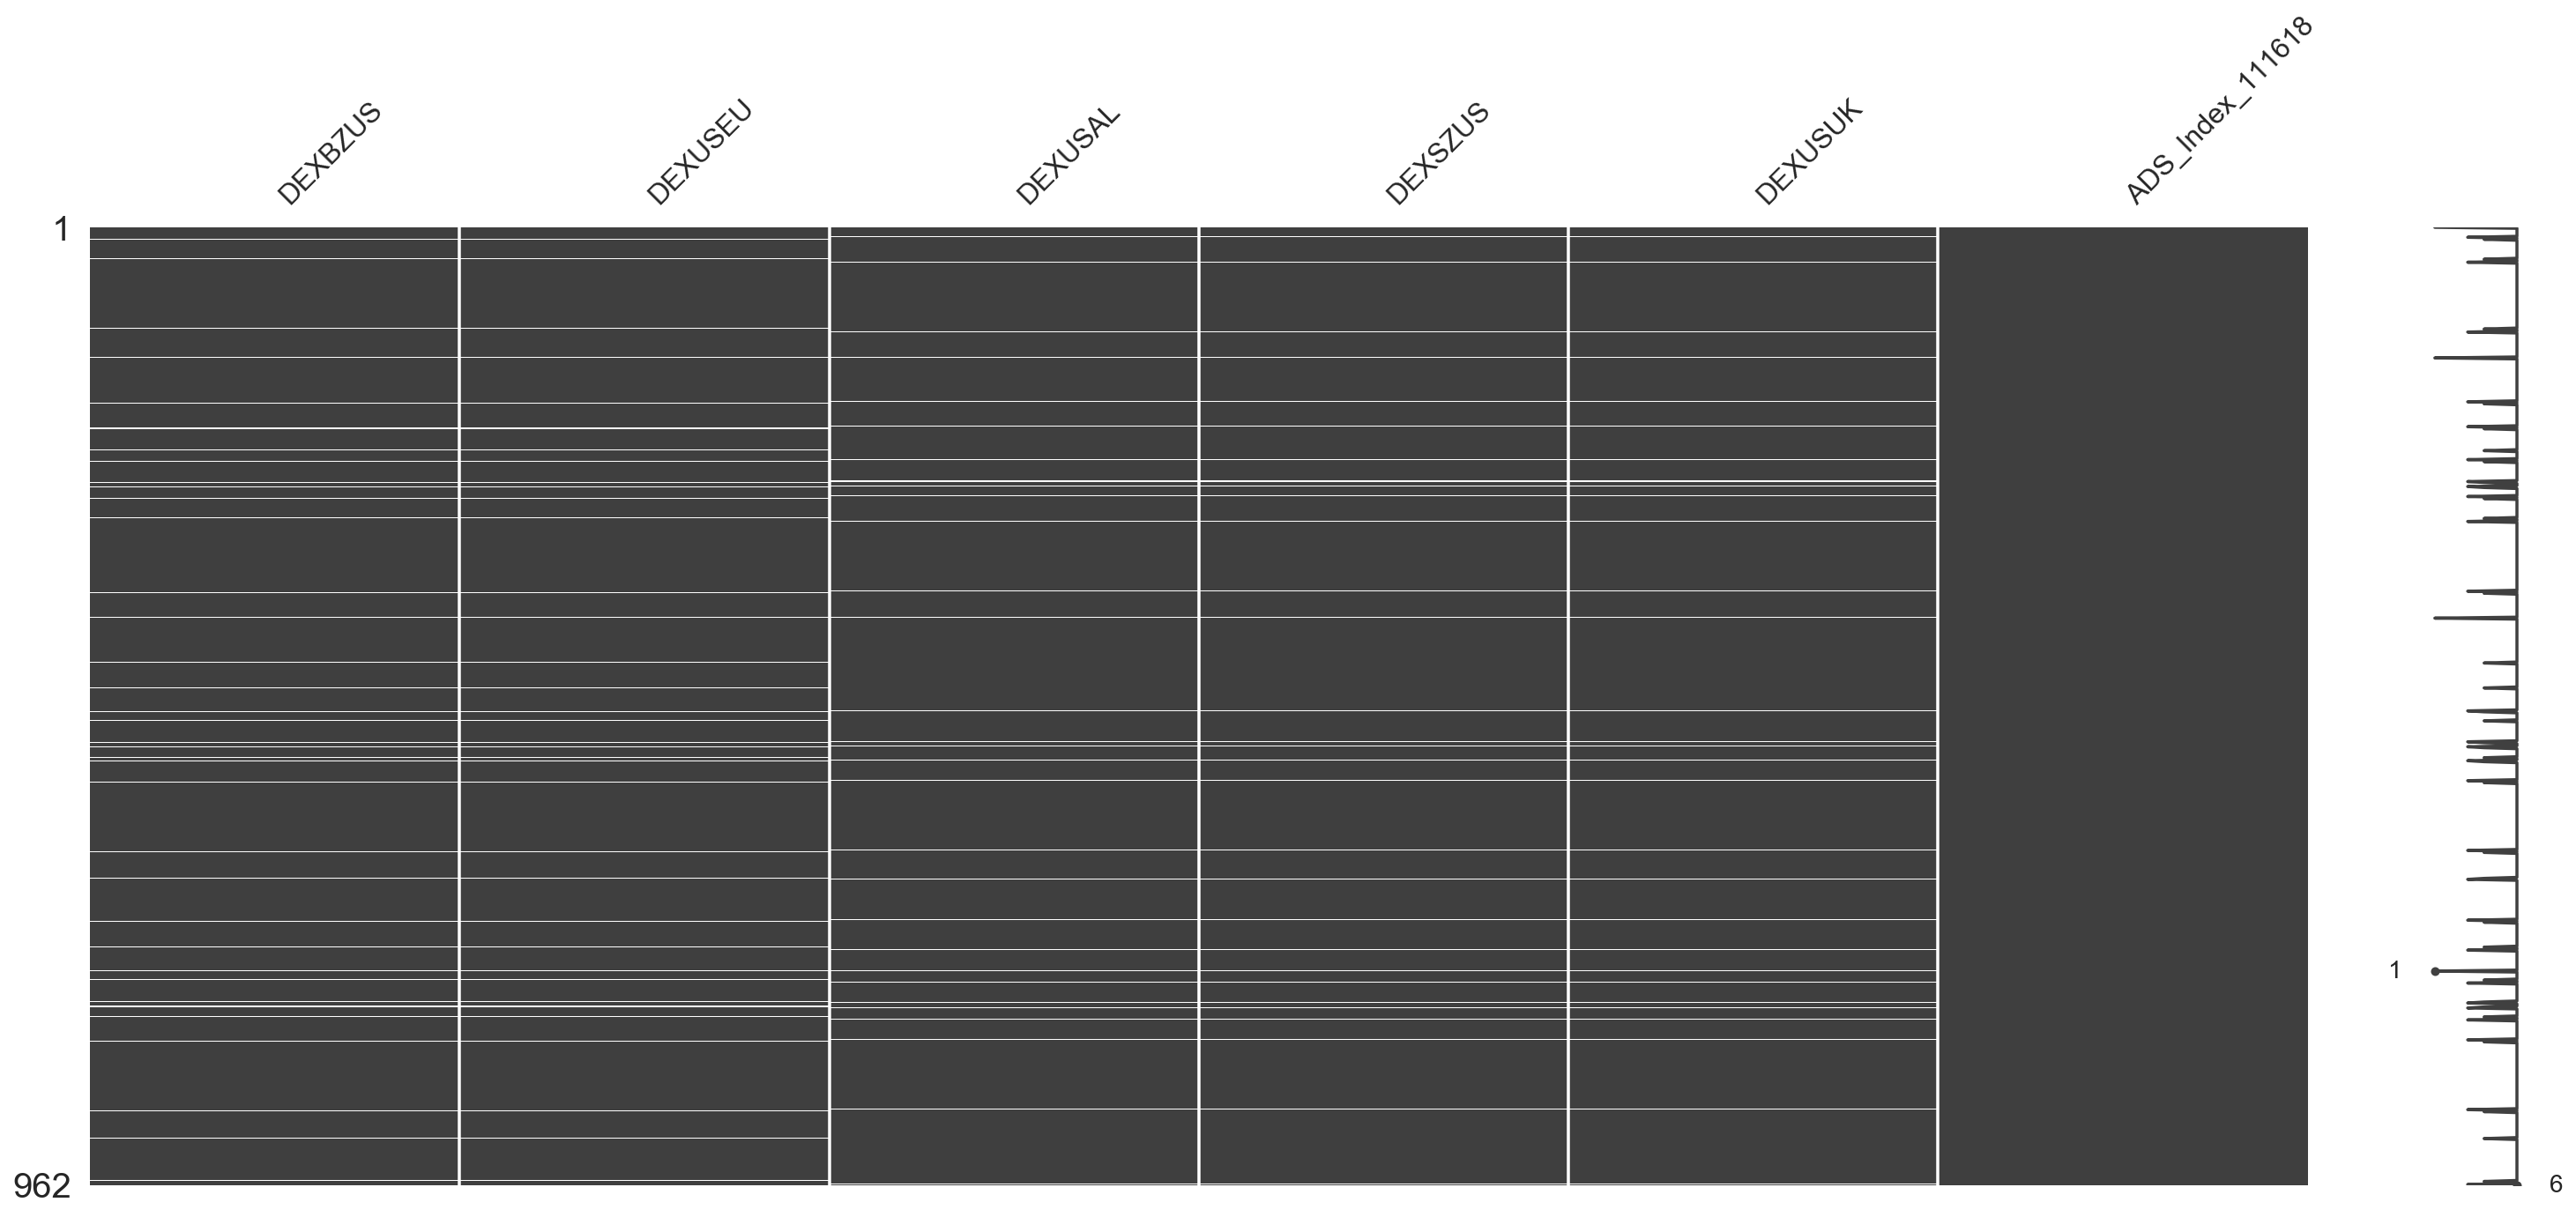

In [15]:
msno.matrix(fd)

In [16]:
fd.isnull().sum()

DEXBZUS             37
DEXUSEU             37
DEXUSAL             31
DEXSZUS             31
DEXUSUK             31
ADS_Index_111618     0
dtype: int64

In [17]:
fd.dropna(inplace = True)

### Removing Null Values

In [18]:
fd.isnull().sum()

DEXBZUS             0
DEXUSEU             0
DEXUSAL             0
DEXSZUS             0
DEXUSUK             0
ADS_Index_111618    0
dtype: int64

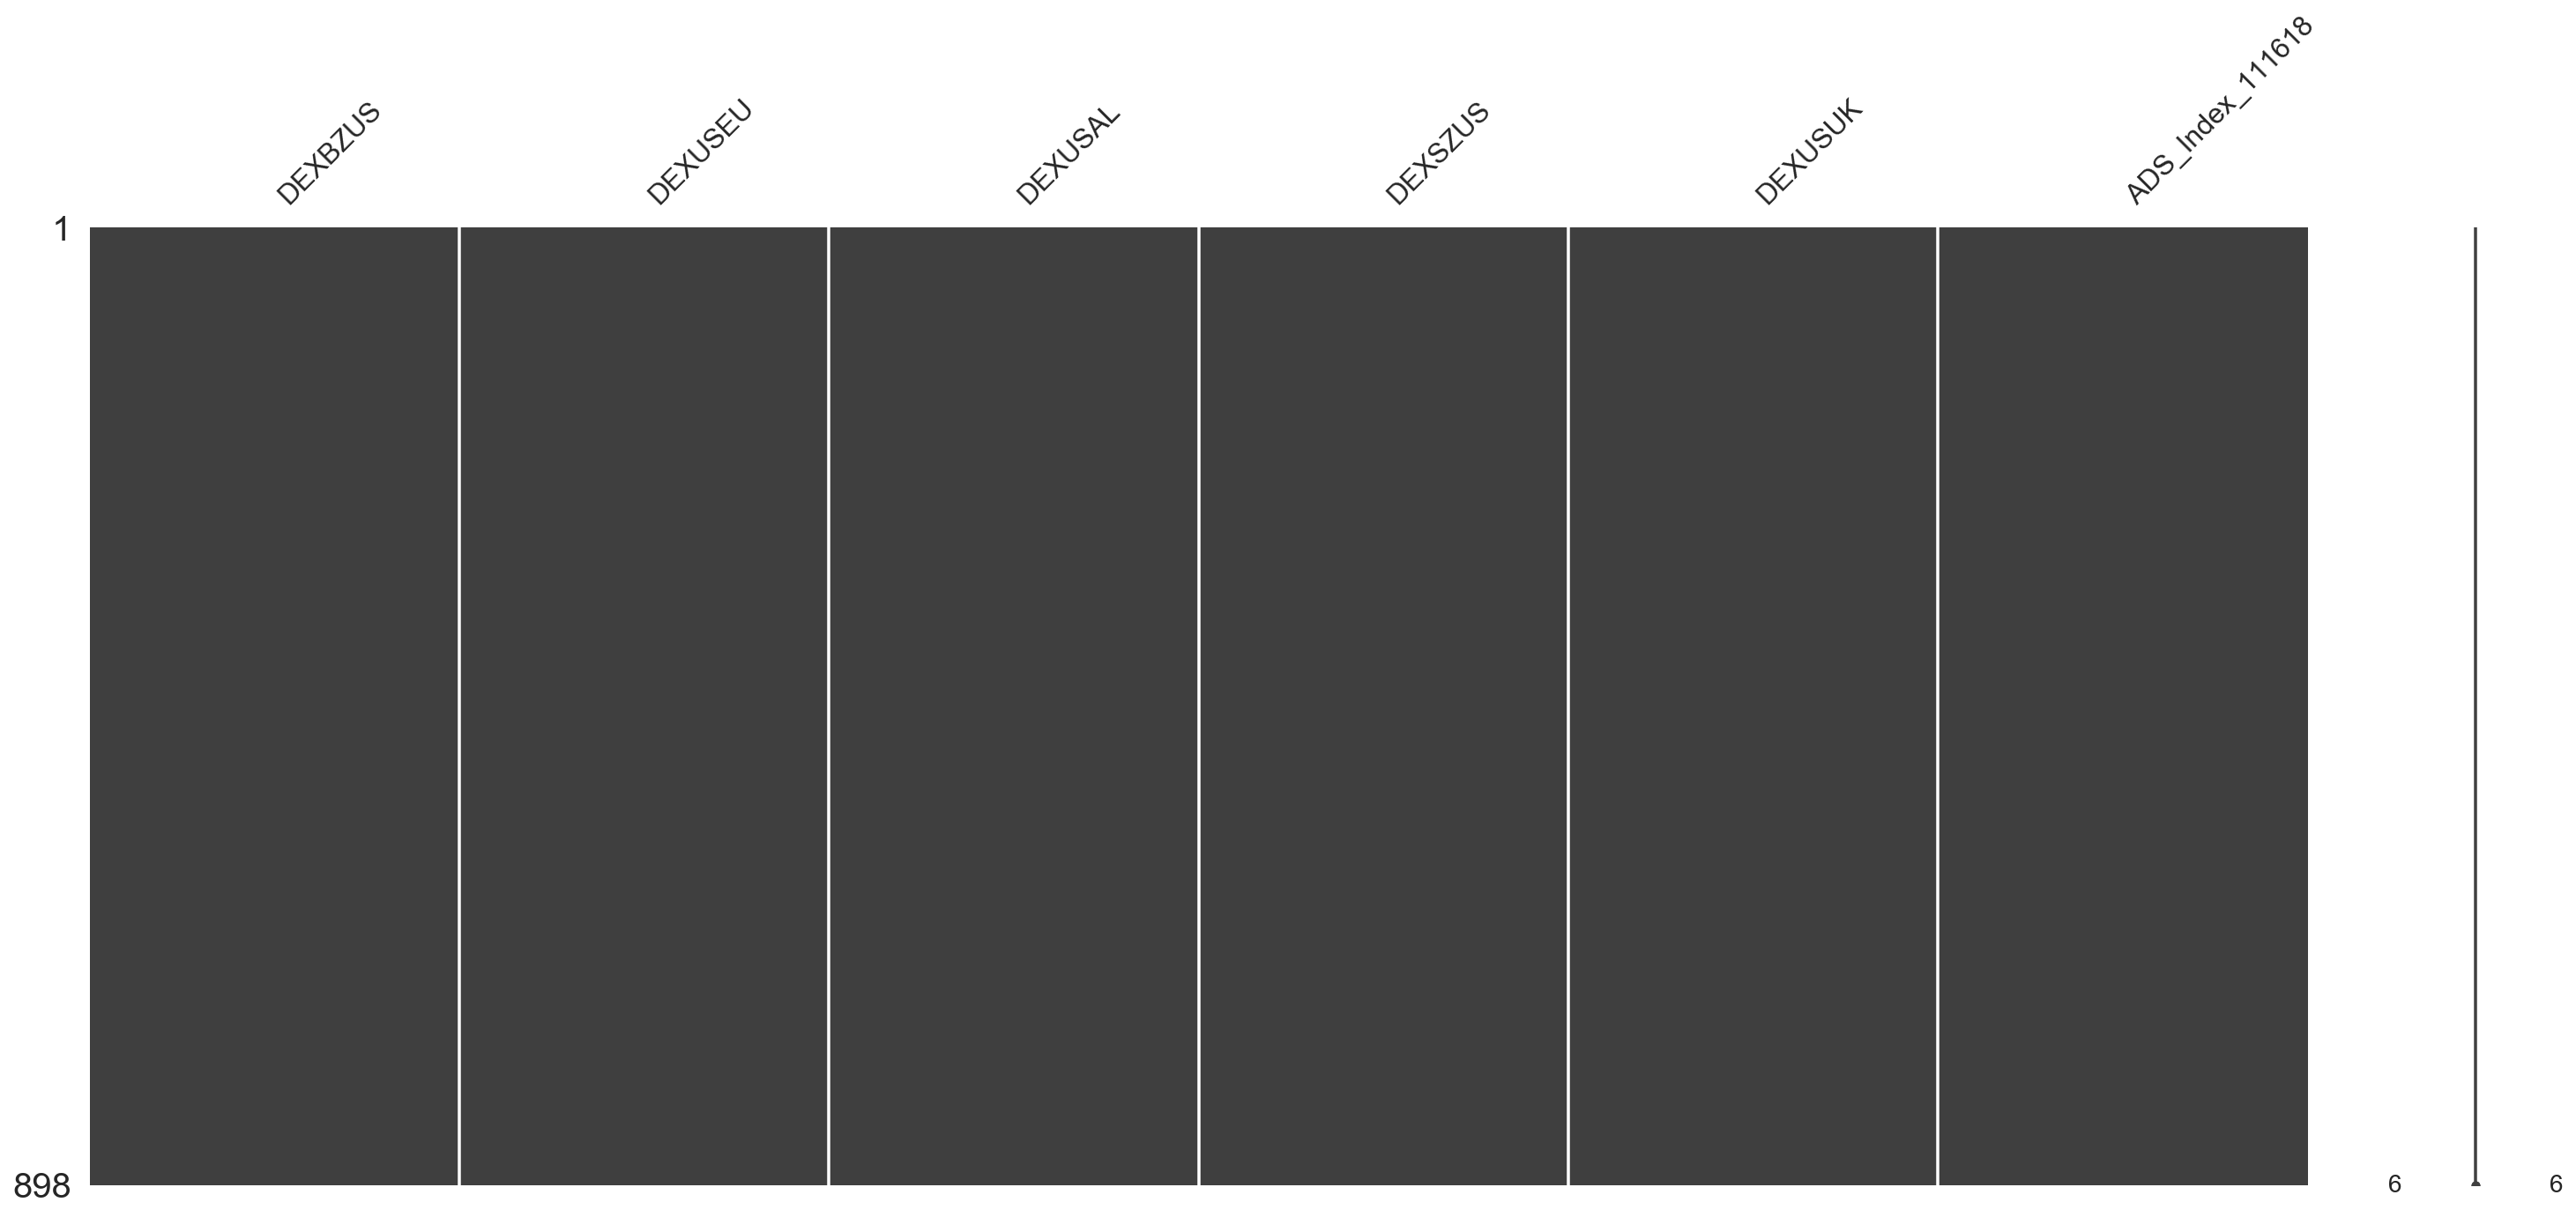

In [19]:
msno.matrix(fd)

# Principle Component Analysis (PCA)

In [20]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
import numpy as np
normalise = StandardScaler().fit_transform(fd.values)
normalise

array([[-2.0918462 ,  1.45303421, -0.76178611,  1.5545308 , -0.48025235,
        -0.21732979],
       [-1.99445512,  1.25352947, -0.66019376,  1.38742547, -0.38395991,
        -0.31866654],
       [-2.07771374,  1.29055097, -0.64011155,  1.34961332, -0.39547314,
        -0.34962589],
       ...,
       [ 2.39152289,  0.52955353,  0.4514156 , -1.29967704, -1.02974723,
         1.14163894],
       [ 2.40043249,  0.64061802,  0.54473881, -1.28138084, -1.01718734,
         1.08887269],
       [ 2.09474125,  0.54189403,  0.72311609, -1.46434288, -0.94706133,
         0.98916819]])

In [21]:
import numpy as np
mean_vec = np.mean(normalise, axis=0)
cov_mat = (normalise - mean_vec).T.dot((normalise - mean_vec)) / (normalise.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00111483 -0.0347709  -0.06008077  0.02922658  0.00370787 -0.06687308]
 [-0.0347709   1.00111483 -0.50418154 -0.13320191 -0.76986961  0.36842969]
 [-0.06008077 -0.50418154  1.00111483 -0.55919743  0.74919719 -0.05568945]
 [ 0.02922658 -0.13320191 -0.55919743  1.00111483  0.02338769 -0.51281972]
 [ 0.00370787 -0.76986961  0.74919719  0.02338769  1.00111483 -0.42845543]
 [-0.06687308  0.36842969 -0.05568945 -0.51281972 -0.42845543  1.00111483]]


In [22]:
cov_mat = np.cov(normalise.T)

eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vec)
print('\nEigenvalues \n%s' %eig_val)

Eigenvectors 
[[-0.00769442  0.11578311  0.99134049 -0.03218116 -0.05170208  0.0083888 ]
 [ 0.54193179 -0.10749279 -0.00673232  0.06734598 -0.58765729 -0.58722512]
 [-0.49386983 -0.43107993  0.01486233 -0.68288137 -0.22001185 -0.23517997]
 [ 0.0193086   0.71437894 -0.12328387 -0.42274044 -0.45576162  0.29607914]
 [-0.60364773  0.00429089 -0.01423843  0.59031208 -0.53382193  0.04420488]
 [ 0.31237784 -0.52806627  0.03970109 -0.03039902 -0.33301064  0.71426167]]

Eigenvalues 
[2.52624212 1.74254784 0.9940842  0.05171524 0.21542861 0.47667095]


In [23]:
cor_mat_1 = np.corrcoef(normalise.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat_1)

print('Eigenvectors  \n%s' %eig_vecs)
print('\nEigenvalues  \n%s' %eig_vals)

Eigenvectors  
[[-0.00769442  0.11578311  0.99134049 -0.03218116 -0.05170208  0.0083888 ]
 [ 0.54193179 -0.10749279 -0.00673232  0.06734598 -0.58765729 -0.58722512]
 [-0.49386983 -0.43107993  0.01486233 -0.68288137 -0.22001185 -0.23517997]
 [ 0.0193086   0.71437894 -0.12328387 -0.42274044 -0.45576162  0.29607914]
 [-0.60364773  0.00429089 -0.01423843  0.59031208 -0.53382193  0.04420488]
 [ 0.31237784 -0.52806627  0.03970109 -0.03039902 -0.33301064  0.71426167]]

Eigenvalues  
[2.52342894 1.74060736 0.9929772  0.05165765 0.21518872 0.47614014]


In [24]:
cor_mat_2 = np.corrcoef(normalise.T)

eig_valss, eig_vecss = np.linalg.eig(cor_mat_2)

print('Eigenvectors raw  \n%s' %eig_vecss)
print('\nEigenvalues raw  \n%s' %eig_valss)

Eigenvectors raw  
[[-0.00769442  0.11578311  0.99134049 -0.03218116 -0.05170208  0.0083888 ]
 [ 0.54193179 -0.10749279 -0.00673232  0.06734598 -0.58765729 -0.58722512]
 [-0.49386983 -0.43107993  0.01486233 -0.68288137 -0.22001185 -0.23517997]
 [ 0.0193086   0.71437894 -0.12328387 -0.42274044 -0.45576162  0.29607914]
 [-0.60364773  0.00429089 -0.01423843  0.59031208 -0.53382193  0.04420488]
 [ 0.31237784 -0.52806627  0.03970109 -0.03039902 -0.33301064  0.71426167]]

Eigenvalues raw  
[2.52342894 1.74060736 0.9929772  0.05165765 0.21518872 0.47614014]


In [25]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [26]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.5234289368570346
1.740607360240137
0.9929772017265683
0.4761401384302814
0.21518871569751608
0.05165764704846055


In [27]:
!pip install plotly

In [28]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1), 
                      eig_pairs[1][1].reshape(6,1)))

print('Eigen Vector Matrix "W": \n', matrix_w)

Eigen Vector Matrix "W": 
 [[-0.00769442  0.11578311]
 [ 0.54193179 -0.10749279]
 [-0.49386983 -0.43107993]
 [ 0.0193086   0.71437894]
 [-0.60364773  0.00429089]
 [ 0.31237784 -0.52806627]]


In [29]:
Y = normalise.dot(matrix_w)
matrix_w

array([[-0.00769442,  0.11578311],
       [ 0.54193179, -0.10749279],
       [-0.49386983, -0.43107993],
       [ 0.0193086 ,  0.71437894],
       [-0.60364773,  0.00429089],
       [ 0.31237784, -0.52806627]])

In [30]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca= sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(normalise)
Y_sklearn.shape

(898, 3)

In [31]:
pca1=[]
for a in Y_sklearn:
    pca1.append(a[0])

In [32]:
pca2=[]
for a in Y_sklearn:
    pca2.append(a[1])

In [33]:
pca3=[]
for a in Y_sklearn:
    pca3.append(a[2])

In [34]:
data = fd
data['PC1'] = pca1
data['PC2'] = pca2
data['PC3'] = pca3

In [35]:
data.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3
observation_date,,,,,,,,,
2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404,-0.234620,1.431794,-1.153227,-2.288275
2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588,-0.265741,1.179745,-1.076704,-2.173667
2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566,-0.275249,1.187079,-1.043714,-2.252559
2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697,-0.284261,0.978661,-0.995910,-2.244967
2015-01-08,2.6635,1.1811,0.7517,1.2794,1.7645,-0.292778,0.986006,-1.091310,-2.371803


In [36]:
data.shape

(898, 9)

In [37]:
#data['constant'] = np.ones((898,1), dtype=np.float64, order='C')
data['aplha'] = 1

In [38]:
data.shape

(898, 10)

In [39]:
data.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3,aplha
observation_date,,,,,,,,,,
2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404,-0.234620,1.431794,-1.153227,-2.288275,1
2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588,-0.265741,1.179745,-1.076704,-2.173667,1
2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566,-0.275249,1.187079,-1.043714,-2.252559,1
2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697,-0.284261,0.978661,-0.995910,-2.244967,1
2015-01-08,2.6635,1.1811,0.7517,1.2794,1.7645,-0.292778,0.986006,-1.091310,-2.371803,1


# Y(t-1) column

In [40]:
yt = data.iloc[:, 4]
yt = pd.DataFrame(yt)
#yt = np.matrix()
y_tmin1 = []
y_tmin1.append(1.7404)
for i in range(1, 898):
    y_tmin1.append(yt['DEXUSUK'][i-1])
data['Ymin_t'] = y_tmin1
data.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3,aplha,Ymin_t
observation_date,,,,,,,,,,,
2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404,-0.234620,1.431794,-1.153227,-2.288275,1,1.7404
2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588,-0.265741,1.179745,-1.076704,-2.173667,1,1.7404
2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566,-0.275249,1.187079,-1.043714,-2.252559,1,1.7588
2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697,-0.284261,0.978661,-0.995910,-2.244967,1,1.7566
2015-01-08,2.6635,1.1811,0.7517,1.2794,1.7645,-0.292778,0.986006,-1.091310,-2.371803,1,1.7697


# Splitting data into train and test set

In [41]:
train = data.iloc[:628,]
test = data.iloc[628:,]

In [42]:
train.shape

(628, 11)

In [43]:
test.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3,aplha,Ymin_t
observation_date,,,,,,,,,,,
2017-07-31,3.1338,1.1826,0.9434,1.0484,1.9810,-0.297080,-0.869509,1.721507,-0.575298,1,1.9805
2017-08-01,3.1143,1.1799,0.9415,1.0489,1.9806,-0.302087,-0.891770,1.699841,-0.636018,1,1.9810
2017-08-02,3.1165,1.1861,0.9317,1.0480,1.9743,-0.307402,-0.751257,1.661705,-0.630761,1,1.9806
2017-08-03,3.1209,1.1880,0.9299,1.0492,1.9606,-0.312548,-0.681354,1.636178,-0.619388,1,1.9743
2017-08-04,3.1176,1.1754,0.9157,1.0548,1.9532,-0.317523,-0.719239,1.479998,-0.638699,1,1.9606


In [44]:
test.shape

(270, 11)

# Training Function

In [45]:
from numpy.linalg import inv

In [46]:
def train_test(train_data, test_data):
    y_train = train_data.iloc[:, 4] #DEXUSUK
    y_train = pd.DataFrame(y_train)
    y_train = np.matrix(y_train)
    #Y = alpha*beta X
    x_train1 = train_data.iloc[:, [9,1,2,3]]
    x_train1 = pd.DataFrame(x_train1)
    x_train1 = np.matrix(x_train1)
    beta_hat1 = (inv((x_train1.T)*x_train1))*(x_train1.T)*(y_train)
    beta_hat1 = np.matrix(beta_hat1)
    x_test1 = pd.DataFrame(test_data.iloc[:, [9,1,2,3]])
    x_test1 = np.matrix(x_test1)
    y_hat1 = (x_test1*beta_hat1)
    #Yt = alpha + beta1*ADS+ beta2*Y(t-1)
    x_train2 = train_data.iloc[:, [9,5,10]]
    x_train2 = pd.DataFrame(x_train2)
    x_train2 = np.matrix(x_train2)
    beta_hat2 = (inv((x_train2.T)*x_train2))*(x_train2.T)*(y_train)
    beta_hat2 = np.matrix(beta_hat2)
    x_test2 = pd.DataFrame(test_data.iloc[:, [9,5,10]])
    x_test2 = np.matrix(x_test2)
    y_hat2 = (x_test2*beta_hat2)
    #Yt = alpha + beta1*PC1 + beta2*PC2 + beat*PC3
    x_train3 = train_data.iloc[:, [9,6,7,8]]
    x_train3 = pd.DataFrame(x_train3)
    x_train3 = np.matrix(x_train3)
    beta_hat3 = (inv((x_train3.T)*x_train3))*(x_train3.T)*(y_train)
    beta_hat3 = np.matrix(beta_hat3)
    x_test3 = pd.DataFrame(test_data.iloc[:, [9,6,7,8]])
    x_test3 = np.matrix(x_test3)
    y_hat3 = (x_test3*beta_hat3)
    #Yt = alpha + beta1*PC1 + beta2*ADS
    x_train4 = train_data.iloc[:, [9,6,5]]
    x_train4 = pd.DataFrame(x_train4)
    x_train4 = np.matrix(x_train4)
    beta_hat4 = (inv((x_train4.T)*x_train4))*(x_train4.T)*(y_train)
    beta_hat4 = np.matrix(beta_hat4)
    x_test4 = pd.DataFrame(test_data.iloc[:, [9,6,5]])
    x_test4 = np.matrix(x_test4)                                       
    y_hat4 = (x_test4*beta_hat4)
    #Yt = alpha + beta1*Yt-1
    x_train5 = train_data.iloc[:, [9,10]]
    x_train5 = pd.DataFrame(x_train5)
    x_train5 = np.matrix(x_train5)
    beta_hat5 = (inv((x_train5.T)*x_train5))*(x_train5.T)*(y_train)
    beta_hat5 = np.matrix(beta_hat5)
    x_test5 = pd.DataFrame(test_data.iloc[:, [9,10]])
    x_test5 = np.matrix(x_test5)                                       
    y_hat5 = (x_test5*beta_hat5)
    rmse1 = cal_rmse(test_data.iloc[:,[9,1,2,3]], test_data.iloc[:, 4], beta_hat1)
    rmse2 = cal_rmse(test_data.iloc[:, [9,5,10]], test_data.iloc[:, 4], beta_hat2)
    rmse3 = cal_rmse(test_data.iloc[:, [9,6,7,8]], test_data.iloc[:, 4], beta_hat3)
    rmse4 = cal_rmse(test_data.iloc[:, [9,6,5]], test_data.iloc[:, 4], beta_hat4)
    rmse5 = cal_rmse(test_data.iloc[:, [9,10]], test_data.iloc[:, 4], beta_hat5)
    rmse_y_hat_list = {rmse1:y_hat1, rmse2:y_hat2, rmse3:y_hat3, rmse4:y_hat4, rmse5:y_hat5}
    return rmse_y_hat_list

# RMSE Function

In [47]:
def cal_rmse(x_test, y_test, beta_hat):
    x_test = np.matrix(x_test)
    y_test = np.matrix(y_test)
    reg = (x_test*beta_hat)
    mse = (np.square(reg - y_test)).mean()
    rmse = np.sqrt(mse)
    return rmse

# LOWEST RMSE Function

In [48]:
def lowest_RMSE(rmse_y_hat_list):
    rmse_sorted =  sorted(rmse_y_hat_list.keys())
    lowest_rmse =  rmse_sorted[0]
    return lowest_rmse

# Bootstrap Function

In [49]:
def randomSelect(boostrap_times, train_data):
    bst_list = []
    for i in range(0, boostrap_times):
        bst = train_data.sample(n=628, replace=True)
        bst_list.append(bst)
    return bst_list    

In [50]:
def bootstrap(bst_list, test_data):
    lyhb_list = []
    standard_div = 0
    for i in range(0, len(bst_list)):
        rmse_y_hat_dic = train_test(bst_list[i], test_data)
        lowest_rmse_bst = lowest_RMSE(rmse_y_hat_dic)
        lowest_Y_hat_bst = rmse_y_hat_dic[lowest_rmse_bst]
        lowest_Y_hat_bst = pd.DataFrame(lowest_Y_hat_bst)
        #standard_div = standard_div + 1 
        lyhb_list.append(lowest_Y_hat_bst) 
    return lyhb_list   

In [51]:
#lowest_Y_hat_bst_avg[0][1]

# Resamapling using bootstrap 1000 times

In [52]:
bst_list = randomSelect(1000, train)
lyhb_list = bootstrap(bst_list, test)

In [53]:
sum_sd = 0
sum_Y_hat = 0
for i in range(0, len(lyhb_list)):
    #sum_sd = sum_sd + i
    sum_Y_hat = sum_Y_hat + lyhb_list[i]
lowest_Y_hat_bst_avg = sum_Y_hat/1000
lowest_Y_hat_bst_avg.head()

,0
0,1.936353
1,1.938142
2,1.924734
3,1.917660
4,1.920316


#### Calculating mean

In [54]:
sum_yhat = 0
for i in range(0,len(lowest_Y_hat_bst_avg)):
    sum_yhat = sum_yhat + lowest_Y_hat_bst_avg[0][i]

sum_yhat    

452.61424674750214

#### calculating co-variance

In [55]:
np.cov(lowest_Y_hat_bst_avg[0])

array(0.01253168)

#### Calculating standard devaition

In [56]:
np.std(lowest_Y_hat_bst_avg[0])
#print(sd_yhat)

0.11173746644145487

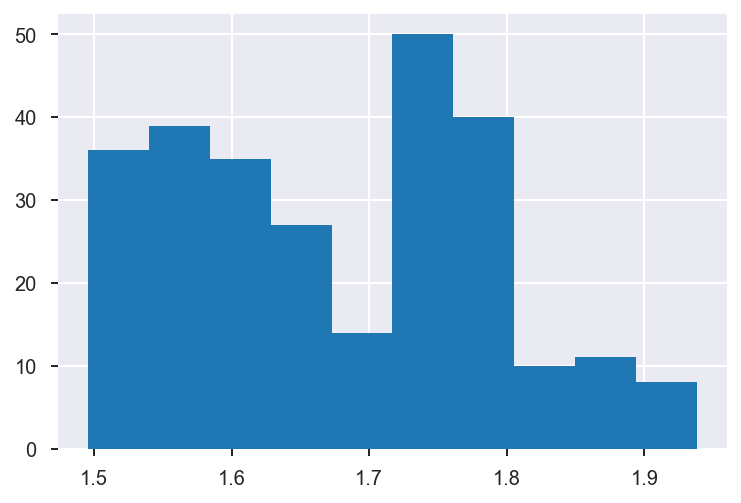

In [57]:
plt.hist(lowest_Y_hat_bst_avg[0])
plt.show()

In [58]:
test.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3,aplha,Ymin_t
observation_date,,,,,,,,,,,
2017-07-31,3.1338,1.1826,0.9434,1.0484,1.9810,-0.297080,-0.869509,1.721507,-0.575298,1,1.9805
2017-08-01,3.1143,1.1799,0.9415,1.0489,1.9806,-0.302087,-0.891770,1.699841,-0.636018,1,1.9810
2017-08-02,3.1165,1.1861,0.9317,1.0480,1.9743,-0.307402,-0.751257,1.661705,-0.630761,1,1.9806
2017-08-03,3.1209,1.1880,0.9299,1.0492,1.9606,-0.312548,-0.681354,1.636178,-0.619388,1,1.9743
2017-08-04,3.1176,1.1754,0.9157,1.0548,1.9532,-0.317523,-0.719239,1.479998,-0.638699,1,1.9606


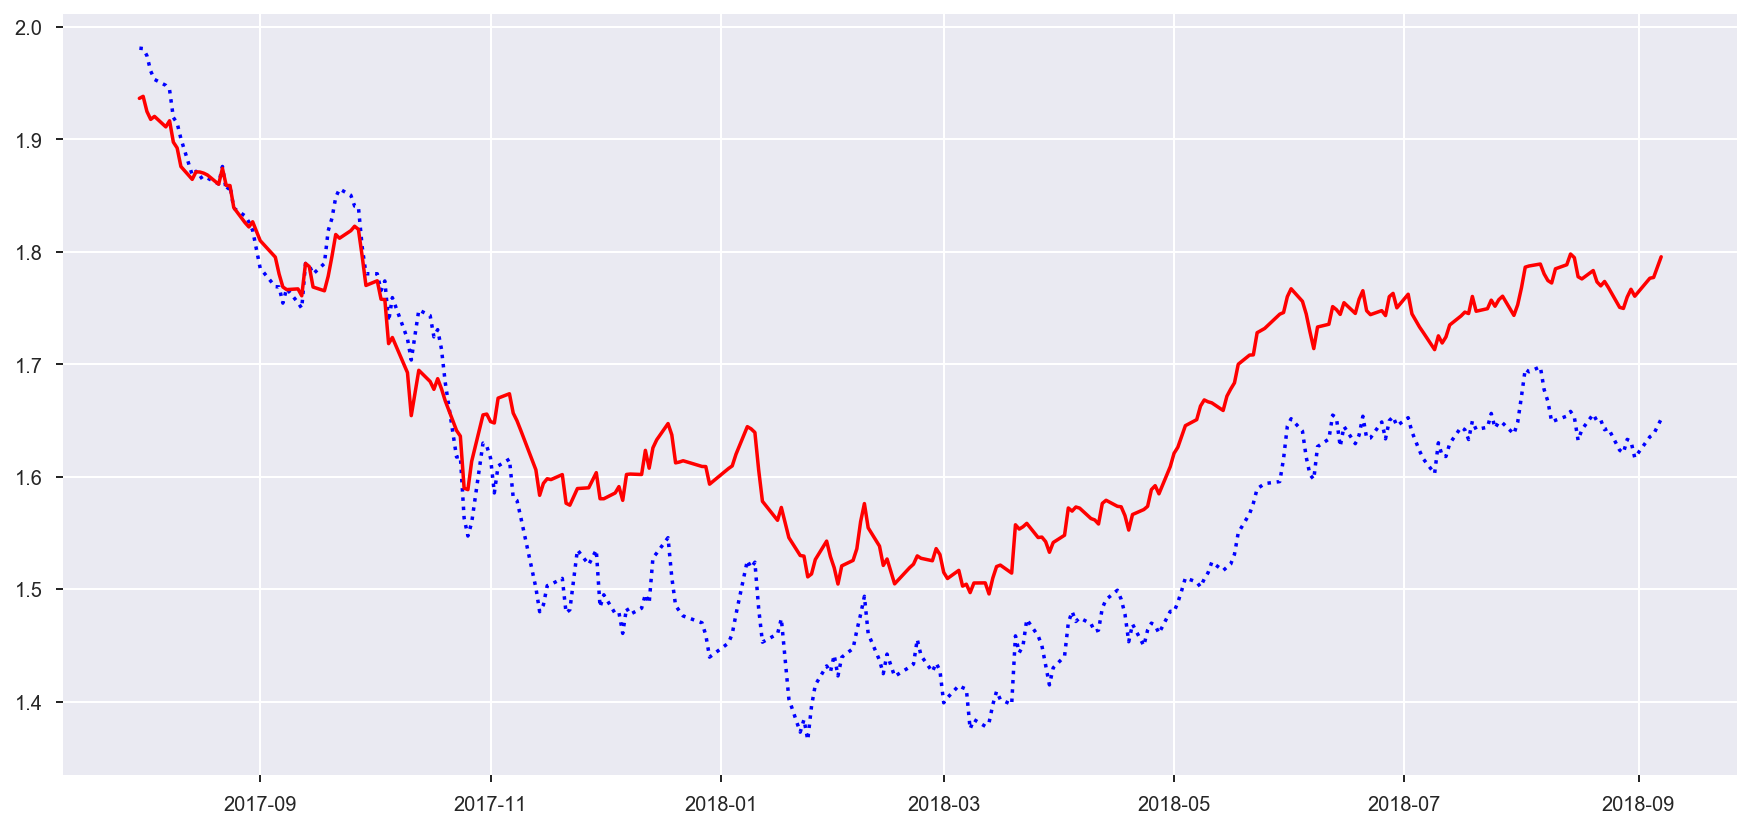

In [59]:
#final_yhat = lowest_Y_hat_bst_avg[0]
#final_yhat['years'] = data['observation_date']
fig = plt.figure(figsize=(15,7))
plt.plot(test.index, test['DEXUSUK'], 'b:')
plt.plot(test.index, lowest_Y_hat_bst_avg[0], 'r')
plt.show()

#### Analysis : We observe that <font color = 'green'>Random Forest</font> takes care of the volatie property of our actual data and generates a smoother and more stable curve. This will help when trading methods like bolingr bands are applied to it. 

# Trading Strategy using Bollinger Band

In [60]:
lowest_Y_hat_bst_avg.head()

,0
0,1.936353
1,1.938142
2,1.924734
3,1.917660
4,1.920316


In [61]:
long_MA = lowest_Y_hat_bst_avg[0].rolling(window=20).mean()
lowest_Y_hat_bst_avg['Long_Moving_Avg'] = long_MA

In [62]:
short_MA = lowest_Y_hat_bst_avg[0].rolling(window=5).mean()
lowest_Y_hat_bst_avg['Short_Moving_Avg'] = short_MA

In [63]:
#long_std = sd_yhat.rolling(window=20)
long_std= lowest_Y_hat_bst_avg[0].rolling(window=20).std()
lowest_Y_hat_bst_avg['Long_std'] = long_std

In [64]:
long_upper_band = ((long_MA) + (long_std)*0.75)
lowest_Y_hat_bst_avg['Long_Upper_Band'] = long_upper_band

In [65]:
long_lower_band = ((long_MA) - (long_std)*0.75)
lowest_Y_hat_bst_avg['Long_Lower_Band'] = long_lower_band


In [66]:
lowest_Y_hat_bst_avg['dates'] = test.index
lowest_Y_hat_bst_avg = lowest_Y_hat_bst_avg.set_index(pd.DatetimeIndex(lowest_Y_hat_bst_avg['dates']))
del lowest_Y_hat_bst_avg['dates']

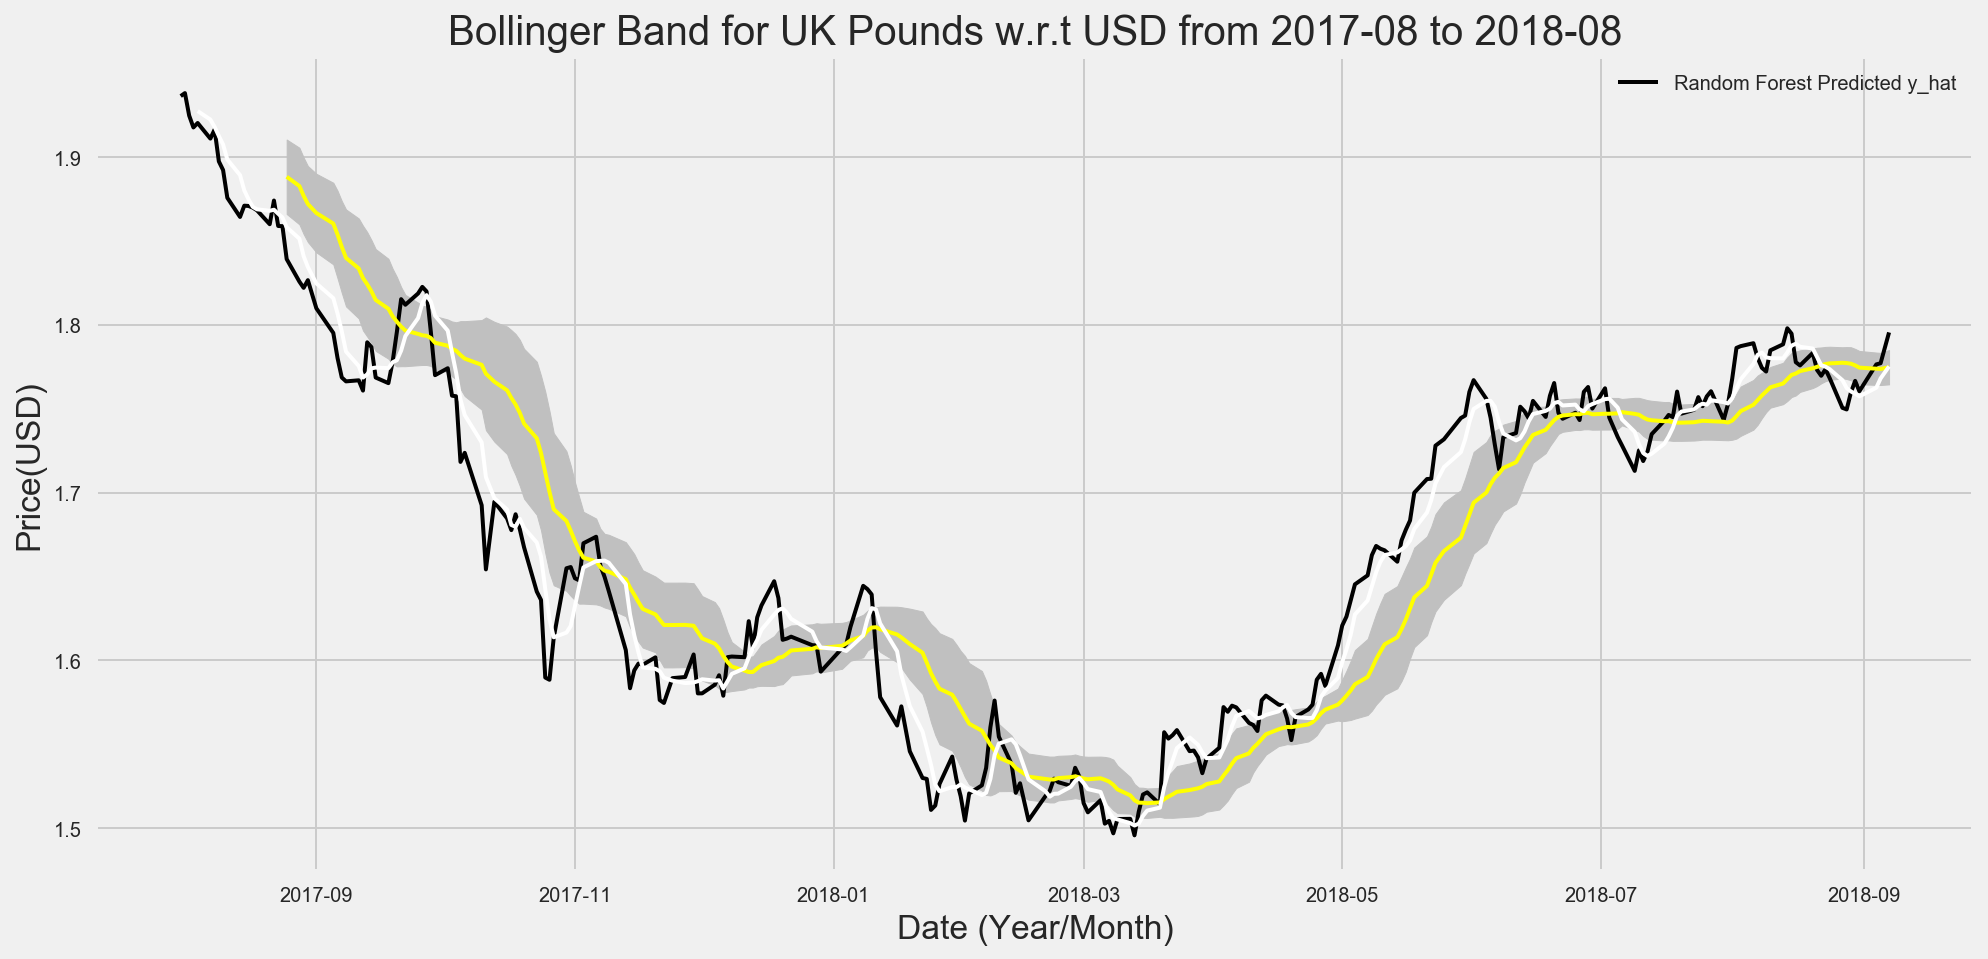

In [67]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
x_axis = lowest_Y_hat_bst_avg[0].index.get_level_values(0)
ax.fill_between(x_axis, lowest_Y_hat_bst_avg['Long_Upper_Band'], lowest_Y_hat_bst_avg['Long_Lower_Band'], color='silver')
ax.plot(x_axis, lowest_Y_hat_bst_avg[0], color='black', lw=2, label = 'Random Forest Predicted y_hat')
ax.plot(x_axis, lowest_Y_hat_bst_avg['Long_Moving_Avg'], color='yellow', lw=2)
ax.plot(x_axis, lowest_Y_hat_bst_avg['Short_Moving_Avg'], color='white', lw=2)

ax.set_title('Bollinger Band for UK Pounds w.r.t USD from 2017-08 to 2018-08')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()

# Trading Strategy using Double Cross-Over

<Figure size 1080x504 with 0 Axes>

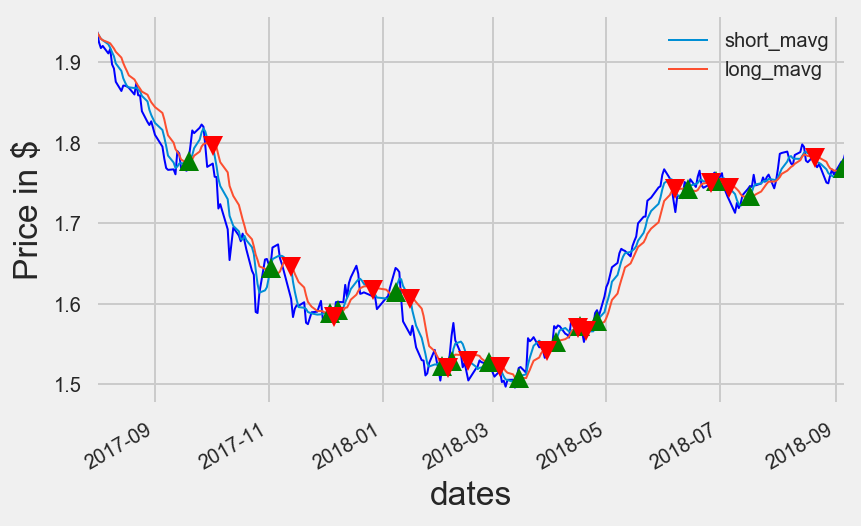

<Figure size 1080x504 with 0 Axes>

In [68]:
ig = plt.figure(figsize=(15,7))
short_window = 5
long_window =10
#df = df.set_index(pd.DatetimeIndex(df['observation_date']))
# Initialize the `signals` DataFrame with the `signal` column
lowest_Y_hat_bst_avg = lowest_Y_hat_bst_avg.set_index(pd.DatetimeIndex(lowest_Y_hat_bst_avg.index))
signals = pd.DataFrame(index=lowest_Y_hat_bst_avg.index)
signals['signal'] = 0.0
# Create short simple moving average over the short window
signals['short_mavg'] = lowest_Y_hat_bst_avg[0].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = lowest_Y_hat_bst_avg[0].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                           > signals['long_mavg'][short_window:], 1.0, 0.0)

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
#print(signals)

# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
lowest_Y_hat_bst_avg[0].plot(ax=ax1, color='b', lw=1.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1,lw=1.)
listLongShort = ["No data"]

for i in range(1, len(signals)):
    # If the MACD crosses the signal line upward
   if signals.long_mavg[i] > lowest_Y_hat_bst_avg[0][i] and signals.long_mavg[i - 1] <= lowest_Y_hat_bst_avg[0][i - 1]:
       listLongShort.append("BUY")
    # The other way around
   elif signals.short_mavg[i] < lowest_Y_hat_bst_avg[0][i] and signals.short_mavg[i - 1] >= lowest_Y_hat_bst_avg[0][i - 1]:
       listLongShort.append("SELL")
    # Do nothing if not crossed
   else:
       listLongShort.append("HOLD")

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index,
        signals.short_mavg[signals.positions == 1.0],
        '^', markersize=10, color='g')

# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index,
        signals.short_mavg[signals.positions == -1.0],
        'v', markersize=10, color='r')

fig = plt.figure(figsize=(15,7))
plt.show()

In [69]:
signals['Advice'] = listLongShort
pandas_profiling.ProfileReport(signals)

# Postions Taken in Forex Market:
- -1 = SELL
- 1 = BUY
- 0 = HOLD

In [70]:
signals['positions'].value_counts()

 0.0    238
 1.0     16
-1.0     15
Name: positions, dtype: int64

No handles with labels found to put in legend.


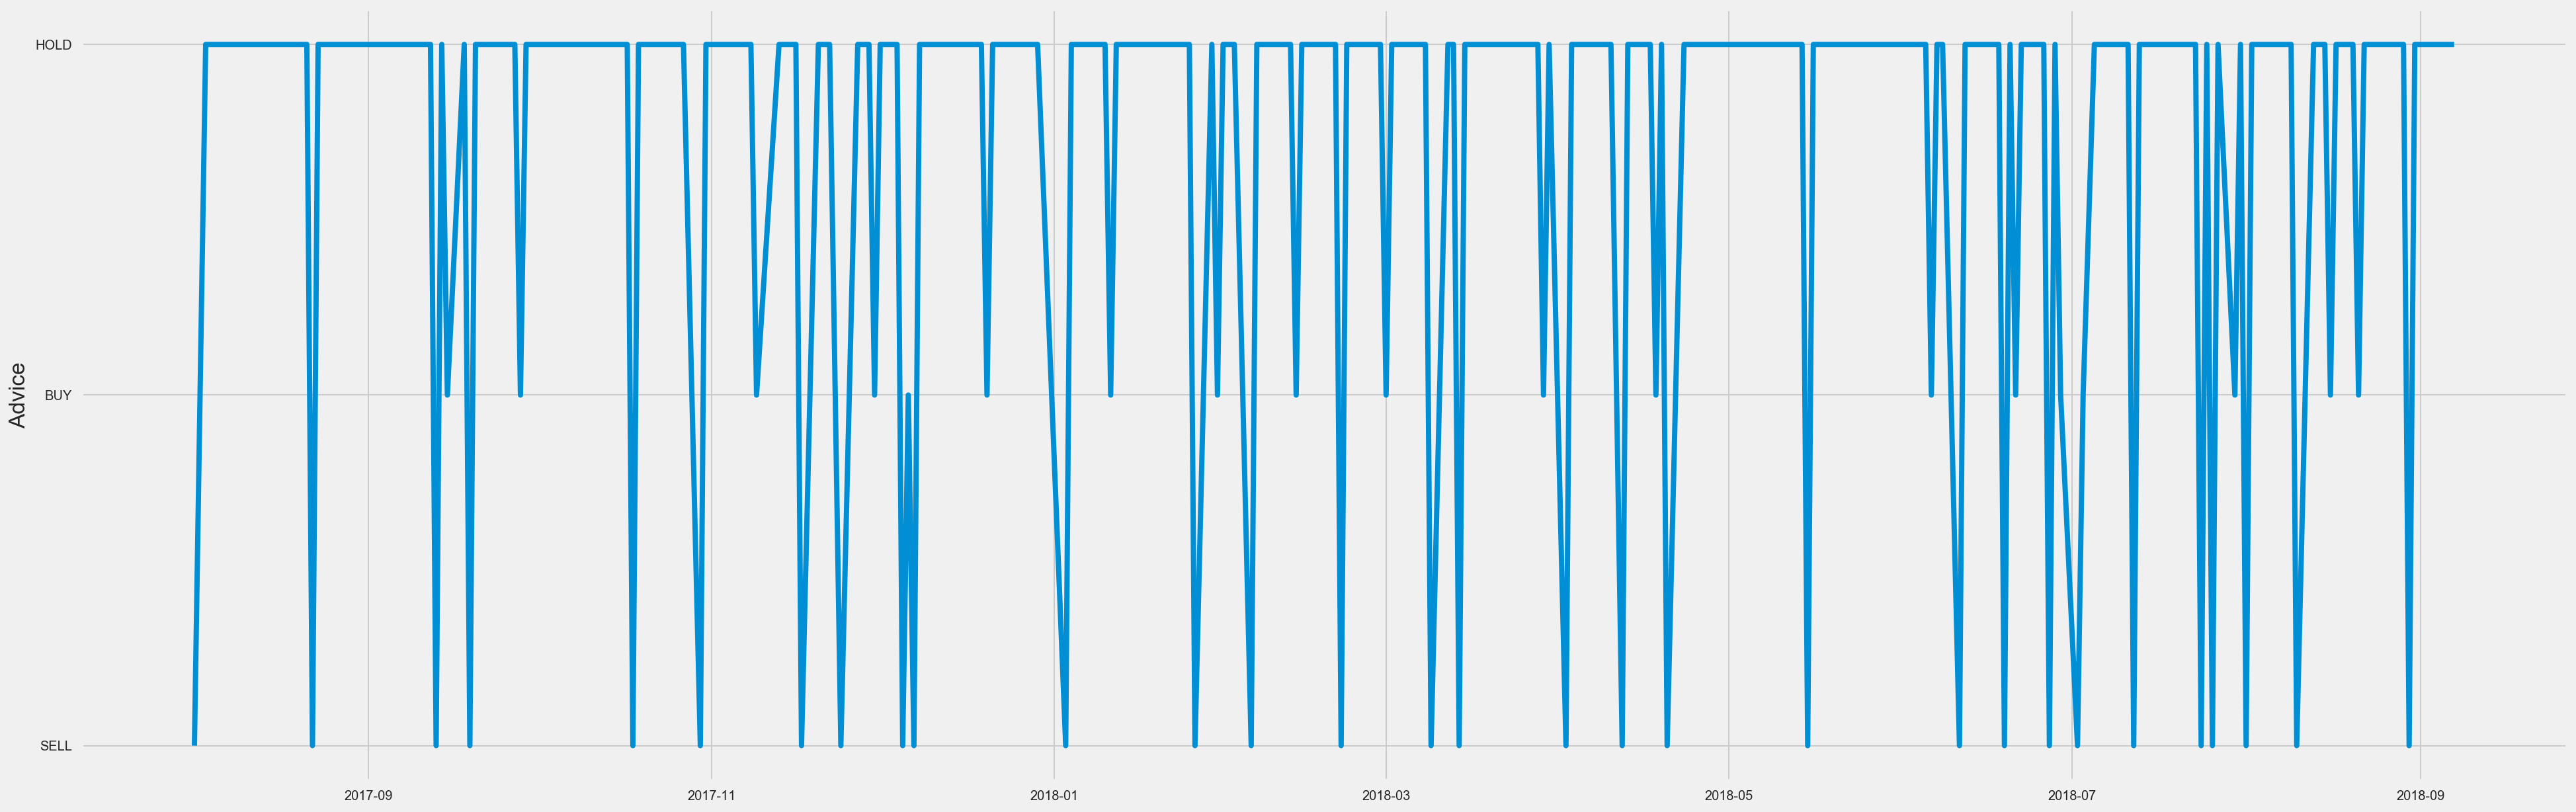

In [71]:
import matplotlib.pyplot as plt
signals = signals[signals.Advice != 'No data']

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)



y_axis=signals.Advice

ax.plot(y_axis)


#ax.set_xlabel('Date (Year)')
ax.set_ylabel('Advice')
ax.legend()
plt.show();

# Calculating Risk Metrics

In [72]:
sell=[]
buy=[]
for i in range(1,len(signals)):
   if signals['positions'].iloc[i]==-1:
       sell.append(signals['long_mavg'].iloc[i])
   elif signals['positions'].iloc[i]==1:
       buy.append(signals['short_mavg'].iloc[i])

In [73]:
profit_loss=[]
for i in range(1,len(sell)):
   profit_loss.append(sell[i]-buy[i])

profit_loss

[0.00626069661056361,
 -0.0029313813657450005,
 0.03024639594715106,
 -0.004745568508119691,
 -0.001027314583114336,
 0.007016063432463637,
 -0.004940374675748593,
 0.03742408202749825,
 0.017026499072089418,
 -0.005150068342829384,
 0.16380616857497587,
 0.007308428638206799,
 -0.005177864671864096,
 0.048833482220141056]

In [74]:
profit=[]
loss=[]
for i in range(1,len(profit_loss)):
   if profit_loss[i]>0:
       profit.append(profit_loss[i])
   elif profit_loss[i]<0:
       loss.append(profit_loss[i])

In [75]:
GrossLoss=sum(loss)
GrossLoss

-0.0239725721474211

In [76]:
GrossProfit=sum(profit)
NetProfit=GrossProfit+GrossLoss
NetProfit

0.287688547765105

In [77]:
ProfitFactor=GrossProfit/GrossLoss    #benchmarking
ProfitFactor

-13.000737592776572

In [78]:
principal = lowest_Y_hat_bst_avg[0].iloc[0]
totalreturn = GrossProfit/principal                  #the profit after the principal amount eg:salary
print('%.2f%%' % (totalreturn*100))

16.10%


In [79]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='tatiya.s', api_key='e9oDZ5ph3cbxFs01p37B')
trace = go.Table(
   header=dict(values=['Risk Metrics', 'Values']),
   cells=dict(values=[['GrossProfit', 'GrossLoss', 'NetProfit','Profit Factor','TotalReturn'],
                      [GrossProfit, GrossLoss, NetProfit,ProfitFactor,(totalreturn*100)]]))


data = [trace]
py.iplot(data, filename = 'basic_table')

/Users/shwetatatiya/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning:

Consider using IPython.display.IFrame instead

